### **Pixel Transformations**

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def show_image(image, title=None):
    if title:
        plt.title(title)
    if image.ndim == 2:
        cmap = "gray"
    elif image.ndim == 3:
        cmap = None

    plt.axis("off")
    plt.imshow(image, cmap=cmap)

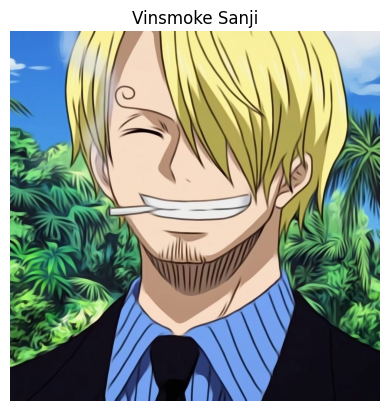

In [4]:
sanji = cv2.imread("images/sanji.png")
sanji = cv2.cvtColor(sanji, cv2.COLOR_BGR2RGB)

show_image(sanji, "Vinsmoke Sanji")

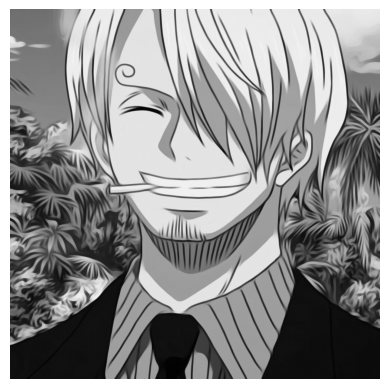

In [5]:
gray_image = cv2.cvtColor(sanji, cv2.COLOR_RGB2GRAY)

show_image(gray_image)

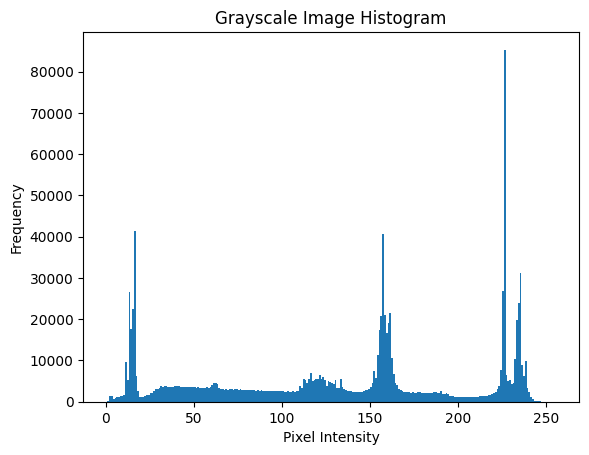

In [6]:
def pixel_histogram(image, title = "Grayscale Image Histogram"):
    pixel_values = image.ravel() # ravel() -> multidimen to single

    plt.hist(pixel_values, bins=256, range=(0, 256))
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

pixel_histogram(gray_image)

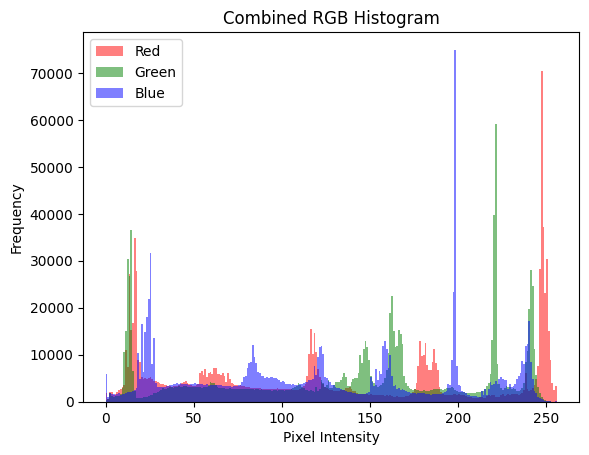

In [8]:
r, g, b = cv2.split(sanji)

plt.figure()
plt.title("Combined RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.hist(r.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue')
plt.legend()
plt.show()

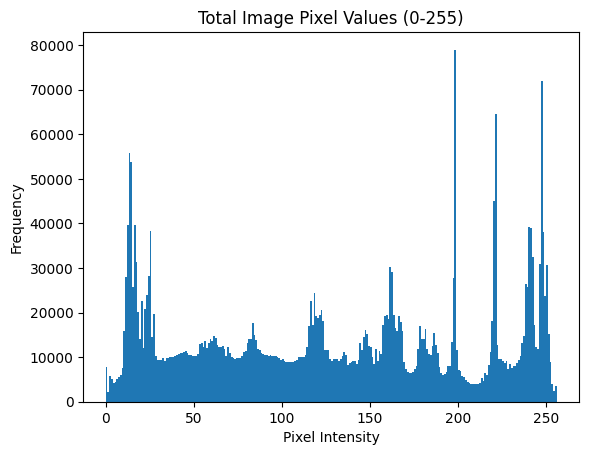

In [9]:
# Alternatively, to treat all pixels as a single intensity value dataset
all_pixel_values = sanji.ravel()
pixel_histogram(all_pixel_values, title="Total Image Pixel Values (0-255)")

<BarContainer object of 256 artists>

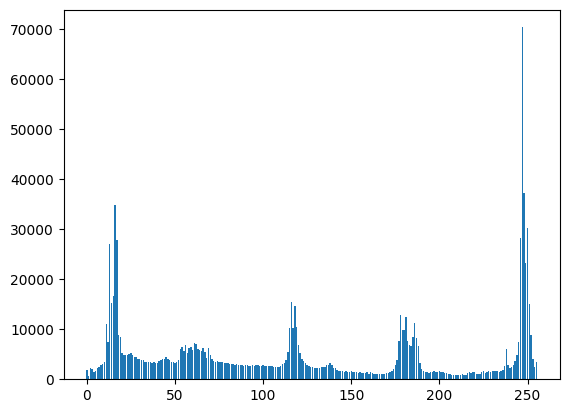

In [30]:
intensity_values = [_ for _ in range(256)]
hist = cv2.calcHist([sanji], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:,0])

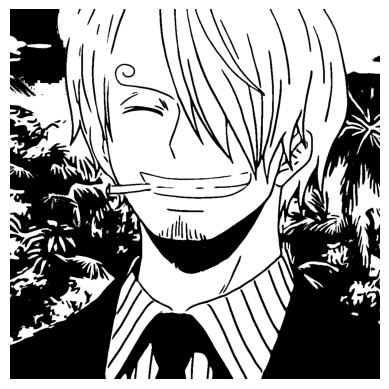

In [40]:
# Thresholding with NumPy
binary_img = np.where(gray_image >= 127, 255, 0).astype(np.uint8)

# cv2.imwrite("images/saved/sanji_binary.jpg", binary_img)
show_image(binary_img)

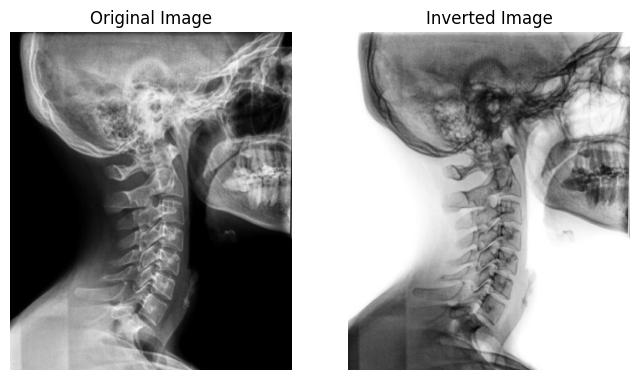

In [70]:
xray = cv2.imread("images/xray.png", cv2.IMREAD_GRAYSCALE)

# inverted_img = 255 - xray
inverted_img = (-1 * xray.astype(np.int16) + 255).astype(np.uint8)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(xray, cmap="gray")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Inverted Image")
plt.imshow(inverted_img, cmap="gray")

**Adding Noise to Image**

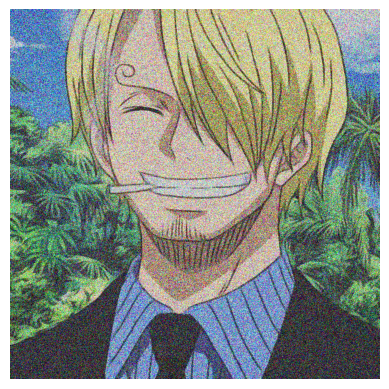

In [10]:
def add_random_noise(image, noise_range=20):
    if image is None:
        raise ValueError("Input must be a valid image (e.g., from cv2.imread).")

    new_image = image.copy()

    noise = np.random.randint(-noise_range, noise_range + 1, image.shape, dtype=np.int16)

    new_image = new_image.astype(np.int16) + noise
    new_image = np.clip(new_image, 0, 255)

    return new_image.astype(np.uint8)

show_image(add_random_noise(sanji, 200))